In [1]:
import pathlib
from google.colab import drive
def create_file_folder(project_name):
  gdrive_path = pathlib.Path("/content/gdrive")
  project_path = gdrive_path.joinpath(f"My Drive/Université/PhD/Recherche/Collabfiles/{project_name}")
  drive.mount(gdrive_path.as_posix(), force_remount=True)
  project_path.mkdir(parents=True, exist_ok=True)
  return project_path

project_path = create_file_folder("Iteration1_DiscriminationInjection")

Mounted at /content/gdrive


In [2]:
%%capture
!pip install git+https://github.com/Tuttusa/TVAE.git
!pip install matplotlib==3.1.3

In [3]:
from fastai.data.external import untar_data, URLs
import pandas as pd

from tvae.optim import Optim


def adult_dataset():
    path = untar_data(URLs.ADULT_SAMPLE)
    df = pd.read_csv(path / 'adult.csv')

    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex',
                 'native-country']
    # cont_names = ['age', 'education-num', 'capital-loss', 'capital-gain', 'hours-per-week']
    cont_names = ['age', 'education-num', 'hours-per-week']

    all_cols = cat_names + cont_names

    t = ['age', 'race']

    if 'fnlwgt' in df.columns:
        df = df.drop(columns='fnlwgt')

    t_df = df[[c for c in all_cols if c in t]]
    t_cat_cols = [c for c in cat_names if c in t]
    t_cont_cols = [c for c in cont_names if c in t]

    x_df = df[[c for c in all_cols if c not in t]]
    x_cat_cols = [c for c in cat_names if c not in t]
    x_cont_cols = [c for c in cont_names if c not in t]

    return t_df, t_cat_cols, t_cont_cols, x_df, x_cat_cols, x_cont_cols, df, cat_names, cont_names, all_cols


t_df, t_cat_cols, t_cont_cols, x_df, x_cat_cols, x_cont_cols, df, cat_names, cont_names, all_cols = adult_dataset()

In [4]:
%%capture
from tvae import TVAE, VAEConfig, Optim

# config = VAEConfig()
# xvae = TVAE(config=config, df=x_df, cat_names=x_cat_cols, cont_names=x_cont_cols)
# recon_perf, ood_perf = xvae.train_and_evaluate(N=10000)
xoptim = Optim(save_path=project_path.joinpath('optimization'), name='vae')
xoptim.find_best_config(df, cat_names, cont_names, nb_trials=20)

[I 2023-02-13 04:07:19,789] Using an existing study with name 'vae_compression' instead of creating a new one.
/usr/local/lib/python3.8/dist-packages/torch/amp/autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.8/dist-packages/torch/cuda/amp/grad_scaler.py:118: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,109.720329,105.736946,637.557617,1561.703247,11116.099609,-0.013018,1.417506,00:45
1,86.869003,46.172737,380.579712,1199.232422,34449.445312,-0.008302,1.408707,00:21
2,73.722794,40.921989,293.740662,1043.184448,70405.132812,-0.006342,1.386138,00:21
3,66.935516,42.710545,253.141312,950.535400,82033.429688,-0.001355,1.359527,00:21
4,64.889412,45.041725,231.771683,892.860229,74489.609375,-0.002445,1.333294,00:23
5,64.929024,45.465256,214.938553,853.757751,66242.257812,-0.004722,1.306079,00:21
6,65.125946,47.377480,208.869385,826.671692,58820.058594,-0.004849,1.273676,00:28
7,65.602310,48.709995,206.852386,808.233643,52656.191406,-0.003761,1.243531,00:22
8,66.102341,49.544472,203.890289,793.243225,47838.351562,-0.002981,1.218249,00:21
9,66.791435,50.968143,204.694672,782.315735,43785.281250,-0.002613,1.197490,00:21


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,319.311218,243.950623,71.221504,178.142563,1699699200.000000,-0.018344,24.483431,00:31
1,230.362274,153.877502,44.330505,158.997620,250936737792.000000,0.031509,91.239639,00:32
2,225.071976,157.549759,36.262066,150.731369,167291174912.000000,0.033685,61.210133,00:29
3,223.523468,155.560043,31.850420,145.605438,125468377088.000000,0.029639,46.173119,00:35
4,227.200455,163.287430,29.790600,142.759766,100374708224.000000,0.027614,37.141872,00:26
5,228.422104,161.359131,28.331629,140.313354,83645587456.000000,0.024850,31.119402,00:34
6,228.890396,165.771591,27.707794,138.291870,71696220160.000000,0.023949,26.817011,00:25
7,230.997437,160.728088,26.955025,136.272552,62734188544.000000,0.021628,23.590054,00:38
8,229.833145,166.834534,27.067980,134.705505,55763726336.000000,0.020829,21.080135,00:32
9,228.247375,158.579239,26.537746,133.186371,50187354112.000000,0.019272,19.072161,00:28


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,140.617767,119.793831,347.660431,1061.507324,10617.817383,-0.031350,1.426878,00:25
1,111.222885,61.961033,230.467682,837.615234,23449.439453,-0.066108,1.418759,00:22
2,95.848236,61.963940,189.604996,735.803528,28898.574219,-0.079738,1.394947,00:22
3,92.260750,66.764351,176.243530,679.775452,26622.275391,-0.068814,1.362328,00:22
4,92.034653,66.977058,167.818573,644.902039,23643.908203,-0.057807,1.323014,00:33
5,91.403114,66.681450,163.076828,621.708984,21033.365234,-0.048917,1.280829,00:22
6,90.793686,67.417892,162.865601,605.140015,18936.416016,-0.042274,1.244997,00:22
7,89.785988,65.953255,161.660629,591.722717,17354.441406,-0.037143,1.216571,00:22
8,88.968178,64.739342,160.149872,580.447205,16115.302734,-0.033598,1.193907,00:23
9,88.413780,65.289902,160.385849,570.863892,15112.212891,-0.030931,1.175492,00:28


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,240.488937,139.544281,112.841927,388.958160,12865.127930,-0.015796,1.482777,00:29
1,194.124741,134.741318,108.854881,360.925079,11138.961914,-0.000388,1.406332,00:23
2,184.542343,135.684708,107.393433,347.353333,9529.797852,0.002761,1.338644,00:28
3,179.277237,128.750244,104.598297,338.230377,8518.312500,0.002878,1.280926,00:27
4,172.939163,125.060440,102.080086,331.302124,7876.421875,0.002196,1.234513,00:24
5,170.698898,122.133774,99.806740,326.143311,7389.012207,0.001803,1.199676,00:32
6,168.774979,121.610497,98.237541,322.105530,7043.557617,0.001811,1.173485,00:24
7,167.116913,120.104050,96.779076,318.812805,6771.757812,0.000514,1.153639,00:24


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,250.892624,182.608124,16.506617,166.998108,19417.744141,-0.075347,1.334347,00:30
1,219.799423,173.465088,18.453411,152.039169,12552.851562,-0.047607,1.225284,00:35
2,205.248184,158.027176,18.746536,142.986847,9843.404297,-0.030897,1.157419,00:26
3,193.937317,149.531586,18.814402,135.803299,8567.397461,-0.024491,1.120093,00:35
4,188.754456,142.090454,18.931051,129.838577,7798.312988,-0.019710,1.096846,00:35
5,178.373306,137.376114,18.858448,125.089172,7299.312012,-0.016407,1.081216,00:26


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,180.105270,114.467255,92.121162,583.977905,12395.171875,-0.019715,1.423322,00:23
1,131.166824,76.069099,74.366035,488.181061,27819.533203,-0.029876,1.415608,00:23
2,113.114182,75.772621,70.285858,439.841888,30527.117188,-0.028036,1.374637,00:23
3,110.183197,80.608437,72.153435,413.690216,26829.630859,-0.025285,1.334764,00:31
4,111.887680,83.585686,71.458214,397.549591,23862.617188,-0.024543,1.296729,00:23
5,112.880341,84.453781,72.309845,386.725708,21234.402344,-0.021225,1.261745,00:23
6,113.154961,86.359123,75.381874,379.089020,19098.093750,-0.018224,1.230944,00:24
7,112.532677,83.607635,75.878105,373.286163,17462.468750,-0.015632,1.205214,00:29
8,111.829102,82.739815,76.595284,368.049866,16177.248047,-0.013640,1.184249,00:22
9,110.976875,82.320709,76.802917,363.987122,15148.501953,-0.011838,1.166949,00:23


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,150.945389,120.638809,511.684723,1073.460571,11765.768555,-0.005326,1.410460,00:22
1,121.171684,69.348145,347.546234,896.826660,32340.656250,0.024529,1.403024,00:22
2,109.957138,77.182365,318.723236,817.568604,32176.068359,0.026112,1.373744,00:22
3,106.392700,77.498711,298.288483,772.359009,28443.474609,0.020392,1.336935,00:30
4,104.663834,78.383972,292.870880,745.359863,24435.517578,0.016431,1.287256,00:22
5,103.337013,78.850914,290.845001,728.218994,21357.949219,0.014240,1.244926,00:22
6,102.091301,78.489151,289.944489,715.794312,19053.953125,0.012774,1.212297,00:22
7,101.122902,78.022720,287.616821,707.046265,17341.607422,0.011509,1.187255,00:30
8,100.660011,77.013985,284.926727,700.144653,15985.224609,0.010287,1.167408,00:23
9,100.292511,76.707985,282.819214,694.223022,14897.827148,0.009855,1.151381,00:22


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,175.940552,140.290131,27.694262,188.032394,61787.468750,-0.019322,1.294005,00:26
1,147.812195,130.429306,24.533100,172.190323,35070.468750,-0.014138,1.176590,00:34
2,144.398453,129.439362,24.095869,163.635818,25090.281250,-0.009283,1.120140,00:26
3,140.224808,122.763031,23.678717,156.652115,20112.835938,-0.007386,1.090799,00:34
4,134.756363,112.481636,22.623329,149.747772,17162.839844,-0.006322,1.072916,00:26
5,131.022446,108.733116,21.865046,144.241165,15191.570312,-0.005167,1.060903,00:34
6,126.325386,107.148468,21.319160,139.723755,13815.981445,-0.004611,1.052263,00:26
7,121.346436,102.639755,20.658598,135.838669,12763.654297,-0.004179,1.045778,00:33


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,88.767509,73.545471,379.228394,1150.470337,21504.808594,0.006875,1.408979,00:26
1,61.129150,38.237278,217.920959,944.583862,118753.750000,0.005701,1.341246,00:21
2,49.794041,35.441307,177.535889,843.186218,247643.078125,0.000870,1.280772,00:21
3,45.554668,50.674381,201.076767,815.812134,202561.328125,-0.002304,1.262113,00:21
4,44.082191,37.227551,178.514252,769.954346,168919.343750,-0.000482,1.223306,00:21
5,44.008812,37.030441,161.219162,736.424805,144137.031250,-0.000250,1.189140,00:21
6,44.691463,40.220257,154.506760,712.954529,125605.914062,-0.000164,1.163047,00:22
7,45.950165,41.705723,149.385178,694.869934,111467.523438,-0.000109,1.143190,00:29
8,47.389839,42.696972,146.351349,681.620483,100193.195312,-0.000101,1.127666,00:22
9,48.848385,43.488647,143.682419,670.859497,91112.296875,-0.000140,1.115157,00:21


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,577.677856,345.294098,101.828453,206.358429,38847.148438,0.006860,1.833041,00:36
1,357.676147,287.601166,82.963791,194.798462,22479.406250,-0.000446,1.459847,00:27
2,301.629974,250.341492,69.174957,185.766037,16910.857422,-0.003266,1.313035,00:36
3,274.099701,234.877029,62.237900,179.871872,13706.015625,-0.000663,1.236503,00:36
4,257.583557,207.989334,54.750622,174.717331,11740.883789,0.000942,1.189761,00:28
5,245.038452,200.948227,49.324112,170.616241,10425.425781,0.001642,1.158519,00:35


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,142.190369,81.437096,191.049637,575.792786,34534.832031,0.016867,1.383118,00:24
1,112.317726,67.412643,159.156448,541.656250,126436.539062,0.015106,1.360162,00:22
2,102.626862,67.422256,146.206192,513.807251,101192.601562,0.012515,1.311108,00:22
3,100.615906,70.472015,141.384415,500.962402,80258.914062,0.009914,1.251489,00:29
4,101.301353,72.321831,141.580338,491.661316,66170.195312,0.007407,1.204627,00:24
5,102.585762,72.980667,141.222244,485.032501,56378.050781,0.005298,1.171831,00:22
6,104.249954,77.396523,143.349670,481.618347,49311.378906,0.003985,1.148085,00:22
7,105.035324,77.116127,144.505203,478.965668,43962.687500,0.002954,1.130068,00:31
8,105.418266,76.002884,145.648911,476.976105,39717.082031,0.002470,1.115958,00:23
9,105.068314,76.101776,146.288254,475.342102,36344.292969,0.001971,1.104619,00:23


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,116.286346,104.521500,507.099731,1304.550537,11905.955078,-0.006976,1.405793,00:25
1,92.513245,53.838779,325.295258,1023.864563,27662.333984,-0.036665,1.380504,00:26
2,83.285255,59.172562,279.834015,901.415771,26613.664062,-0.042904,1.344798,00:22
3,81.020119,59.105267,252.482590,835.139893,23341.070312,-0.037548,1.296825,00:21
4,78.916626,58.582237,242.409195,794.551636,20271.914062,-0.031164,1.244735,00:22
5,77.687302,56.930733,235.637726,766.982056,17977.621094,-0.026110,1.206537,00:22
6,76.571419,58.546638,233.882309,746.381104,16415.154297,-0.022703,1.178377,00:22
7,75.449730,55.123474,228.098145,729.590515,15176.131836,-0.020015,1.157020,00:27
8,74.680138,55.135773,225.657822,716.511353,14128.330078,-0.017583,1.140290,00:23
9,74.021790,54.725552,222.203598,704.883179,13371.734375,-0.016396,1.126806,00:21


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,169.654465,106.416443,206.541748,634.940979,15589.256836,-0.018850,1.429595,00:27
1,135.677429,75.857361,159.830002,560.830444,47037.980469,-0.028249,1.440199,00:22
2,121.136353,71.742851,137.781494,527.133606,81499.148438,-0.062608,1.416175,00:22
3,117.076401,78.050560,133.371078,507.481567,71332.726562,-0.065381,1.372057,00:22
4,117.332077,80.486610,131.337021,495.061890,61109.039062,-0.060265,1.326205,00:31
5,118.067032,81.010445,130.884567,486.673279,52716.562500,-0.052983,1.282514,00:22
6,119.394424,86.541672,134.595016,481.732971,46330.011719,-0.048635,1.245659,00:22
7,120.427063,85.368057,135.656128,478.061218,41346.125000,-0.045417,1.216485,00:22
8,121.212471,85.962990,137.678635,474.677612,37350.738281,-0.043027,1.193388,00:31
9,122.053703,87.744598,139.795517,471.976135,34172.835938,-0.041064,1.174655,00:22


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,92.660934,95.999786,869.559204,1840.294312,18933.740234,0.002192,1.412448,00:21
1,75.137894,42.925934,549.241516,1411.535522,42554.367188,-0.004140,1.392874,00:21
2,63.750061,34.894047,413.554321,1221.956665,77531.835938,-0.010165,1.368785,00:21
3,57.528923,36.249672,350.279877,1103.304199,92239.585938,-0.013446,1.344958,00:21
4,55.488804,38.827965,313.963013,1029.482544,85087.367188,-0.014649,1.318743,00:25
5,55.141357,38.789639,287.978485,979.817139,75525.898438,-0.013811,1.288858,00:23
6,55.054985,40.186325,276.681030,945.707458,66872.085938,-0.012408,1.253662,00:21
7,55.336849,41.584530,266.530426,921.869751,60098.914062,-0.011550,1.223589,00:22
8,55.603321,41.775600,260.592316,903.270569,54462.804688,-0.010590,1.199715,00:21
9,56.001255,43.813396,260.698059,889.164368,49815.023438,-0.009689,1.180411,00:21


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,108.994499,96.271538,691.037903,1434.090942,3758.020264,0.120196,1.441335,00:20
1,88.466675,49.961868,467.011353,1146.990356,15376.056641,0.224516,1.500421,00:21
2,78.142838,45.090420,377.163452,1026.475830,26369.513672,0.275988,1.528885,00:21
3,72.545891,47.072575,332.623688,953.274597,30523.960938,0.294623,1.508444,00:20
4,70.334419,49.978424,310.794098,908.278687,29001.724609,0.268503,1.467148,00:20
5,69.954750,51.885399,298.800201,878.429504,26641.775391,0.234934,1.429074,00:20
6,70.215759,54.737972,296.700043,857.475952,24401.240234,0.200808,1.391782,00:20
7,70.544350,54.097225,291.843719,842.367126,22461.271484,0.175309,1.357396,00:21
8,70.548897,54.378269,290.370331,830.268738,20774.462891,0.154447,1.325963,00:22
9,70.512123,55.140079,291.320374,821.413757,19344.550781,0.136869,1.298160,00:21


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,432.116547,267.507904,108.879166,233.100082,15125.282227,-0.028237,1.397821,00:34
1,328.079651,262.084076,106.939941,222.104492,10814.579102,-0.011879,1.252789,00:35
2,292.606415,221.159988,94.604218,215.009216,8834.134766,-0.006600,1.176726,00:26
3,279.912903,198.398560,84.893013,208.337723,7672.586914,-0.004524,1.135260,00:35
4,272.128235,195.548615,78.787239,204.184479,6921.875977,-0.003069,1.109879,00:27


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,233.878204,125.001221,380.804657,659.558289,1640494.125000,-0.002737,2.241555,00:23
1,148.087906,99.784927,301.009644,599.319214,865981.625000,0.000446,1.920122,00:23
2,115.188545,93.082191,253.305984,571.052429,583938.812500,0.002945,1.693984,00:23
3,102.254944,78.996300,212.908875,545.987732,440069.687500,0.000956,1.532140,00:32
4,97.215508,77.563591,188.044174,529.016785,353273.781250,-0.000077,1.428181,00:23
5,95.536072,76.275436,169.991592,517.250427,295364.656250,-0.000527,1.358046,00:23
6,94.056244,75.182243,156.924210,507.951019,253986.968750,-0.000747,1.307659,00:32
7,93.021622,75.234306,147.685822,500.535950,222949.656250,-0.000913,1.269714,00:23
8,92.549942,74.668221,140.247696,494.117584,198832.406250,-0.000780,1.240097,00:23
9,91.749191,73.927414,134.259460,488.250641,179547.843750,-0.000887,1.216343,00:32


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,114.623665,109.543518,636.891602,1526.330322,27568.695312,-0.001899,1.415026,00:28
1,106.117279,85.909111,547.486267,1226.759888,22221.796875,-0.001887,1.347697,00:22
2,96.168663,63.801727,475.444092,1090.132690,16834.537109,-0.000423,1.239738,00:22
3,88.394981,60.442417,423.883911,1012.860657,14436.020508,-0.000426,1.181664,00:22
4,83.606689,60.093319,397.048035,964.468567,12857.321289,-0.000010,1.146924,00:25
5,80.744789,58.511341,375.741821,931.663269,11748.426758,0.000307,1.123800,00:27


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,211.075470,141.105225,40.143108,237.717117,4766706.000000,-0.134367,2.342158,00:34
1,143.378006,124.111229,36.801167,215.571136,2398145.500000,-0.136050,1.788294,00:25
2,133.405106,117.690254,33.455193,201.660126,1602098.000000,-0.094948,1.548235,00:33
3,133.173141,113.897903,30.585308,192.151093,1203149.000000,-0.073031,1.414757,00:25
4,133.896194,112.706512,28.800520,185.161667,963622.687500,-0.058803,1.332772,00:34
5,131.673843,108.935196,27.557749,179.405014,803921.000000,-0.049269,1.277686,00:25
6,128.759277,109.431648,27.115738,174.677277,689887.625000,-0.042315,1.238201,00:33
7,125.757904,108.462433,27.353840,170.195526,604378.812500,-0.037765,1.208515,00:25
8,124.112953,104.373032,27.137899,166.045151,537893.687500,-0.033763,1.185387,00:33
9,122.070251,101.525215,26.886637,162.190109,484712.375000,-0.031030,1.166874,00:25


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,138.780365,88.173721,99.250687,607.473999,17111.218750,0.000155,1.403469,00:22
1,97.315956,61.097401,77.037224,521.177185,46163.953125,0.007638,1.339659,00:23
2,80.002312,54.621803,67.201897,469.367645,62896.488281,0.012922,1.287252,00:30
3,74.990334,57.391380,62.619743,439.666443,55463.398438,0.018013,1.252722,00:22
4,75.620781,58.818382,60.186935,420.357941,47789.406250,0.014482,1.216469,00:22
5,76.891060,59.994396,58.866955,406.580200,41735.281250,0.011148,1.185166,00:22
6,78.691261,63.729607,60.857742,396.353699,37073.382812,0.009280,1.160355,00:26
7,80.369225,64.938957,63.076130,388.806763,33379.273438,0.008245,1.141155,00:26
8,81.352936,66.216827,65.172363,382.612885,30489.037109,0.007120,1.125943,00:22
9,81.833359,65.632851,66.547134,377.385590,28170.076172,0.006379,1.113652,00:22


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

In [8]:
xoptim.study.best_trials[0]

FrozenTrial(number=2, state=TrialState.COMPLETE, values=[0.6584996999983401, 64.0, 0.01896361631753032], datetime_start=datetime.datetime(2023, 2, 13, 2, 29, 32, 271720), datetime_complete=datetime.datetime(2023, 2, 13, 2, 37, 43, 807130), params={'nb_layers': 5, 'layers': 180, 'hidden_size': 64, 'dropout': 0.09914141034085083, 'embed_p': 0.3584272973595001, 'wd': 0.06155351058760172, 'bswap': 0.2945580086757549, 'lr': 0.0034871636080011487, 'epochs': 16, 'batch_size': 178}, user_attrs={'layers': [180, 90, 60, 45, 36], 'f1': 0.7639322446854149, 'mape': 0.10543254468707479, 'new_ood': 0.01896361631753032}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, distributions={'nb_layers': IntDistribution(high=6, log=False, low=2, step=1), 'layers': IntDistribution(high=1024, log=False, low=24, step=1), 'hidden_size': IntDistribution(high=128, log=False, low=1, step=1), 'dropout': FloatDistribution(high=0.5, log=False, low=0.0, step=None), 'embed_p': FloatDistribution(high=0.5, log

In [6]:
from tvae.model import TVAE, VAEConfig, DataConfig

config = VAEConfig().from_study(xoptim.study)

tvae = TVAE(config=config, data_config=DataConfig(df=x_df, cat_names=x_cat_cols, cont_names=x_cont_cols))

In [7]:
recon_perf, ood_perf = tvae.train_and_evaluate(N=10000)

/usr/local/lib/python3.8/dist-packages/torch/amp/autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.8/dist-packages/torch/cuda/amp/grad_scaler.py:118: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,mse,ce,kld,mu,std,time
0,539.107056,361.879181,138.405350,209.770462,11299168823803904.000000,0.050610,2687.805176,00:50
1,227746704.000000,284.819092,108.346504,202.083084,5649584411901952.000000,0.023170,1344.520996,00:25
2,11894388.000000,263.852264,91.720634,196.696609,3766389697413120.000000,0.018589,896.733582,00:26
3,623027.437500,256.016998,81.541748,193.649689,2824792205950976.000000,0.013930,672.820251,00:37
4,32935.671875,236.630234,71.382072,191.580368,2259833818447872.000000,0.010763,538.463013,00:25
5,2024.833374,228.887054,63.844849,189.779510,1883194848706560.000000,0.009010,448.888977,00:29
6,406.936768,233.544861,59.154549,188.578659,1614167089872896.000000,0.008484,384.906494,00:28
7,319.310944,231.464279,55.548866,187.600082,1412396102975488.000000,0.007017,336.919159,00:34
8,312.322601,226.654480,52.575848,186.449753,1255463232471040.000000,0.005892,299.595367,00:27
9,309.411865,222.557510,49.872673,185.463135,1129916909223936.000000,0.004293,269.736206,00:25


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

In [12]:
# reconstruction 
recon_perf[0]

,workclass,workclass_rec,education,education_rec,marital-status,marital-status_rec,occupation,occupation_rec,relationship,relationship_rec,sex,sex_rec,native-country,native-country_rec,education-num_na,education-num_na_rec,education-num,education-num_rec,hours-per-week,hours-per-week_rec
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,41.155,12.172,542.596,40.684
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,43.813,13.213,572.576,43.113
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,34.644,9.622,466.366,34.508
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,45.147,13.736,571.756,43.047
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,33.399,9.134,600.783,45.398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,44.062,13.311,532.334,39.853
32557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,42.949,12.875,535.347,40.097
32558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,38.948,11.308,534.702,40.045
32559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,31.004,8.196,343.244,24.533


In [14]:
# categorical performance
recon_perf[2]

,MetricName,workclass,education,marital-status,occupation,relationship,sex,native-country,education-num_na
0,Accuracy,0.697,0.780,0.523,0.267,0.449,0.674,0.899,0.985
0,Recall,0.697,0.780,0.523,0.267,0.449,0.674,0.899,0.985
0,Precision,0.486,0.759,0.411,0.215,0.340,0.648,0.819,0.970
0,F1,0.573,0.729,0.441,0.199,0.333,0.567,0.856,0.978


In [15]:
# continuous performance
recon_perf[1]

,GroupBy,education-num,hours-per-week
0,Min,0.000,0.000
0,Max,4.994,31.988
0,Mean,0.437,3.461
0,Median,0.260,1.962
0,R2,0.934,0.822
0,MARE,0.059,0.149


In [17]:
# new data generated
ood_perf[0] * 100

0.5063291139240507

In [18]:
#realf data entropy
ood_perf[4]

,workclass,education,marital-status,occupation,relationship,sex,native-country,education-num_na
0,1.142,2.032,1.271,2.480,1.493,0.635,0.654,0.078


In [19]:
# synthetic data entropy
ood_perf[5]

,workclass,education,marital-status,occupation,relationship,sex,native-country,education-num_na
0,0.000,1.380,0.602,1.692,0.585,0.052,0.000,0.000


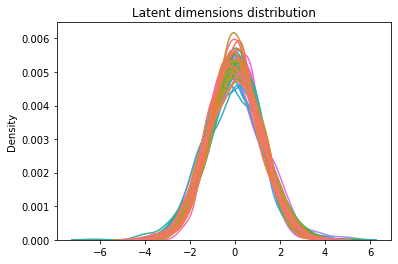

In [20]:
tvae.make_encoding_distribution_plots(N=1000, show=True, legend=False)

workclass


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


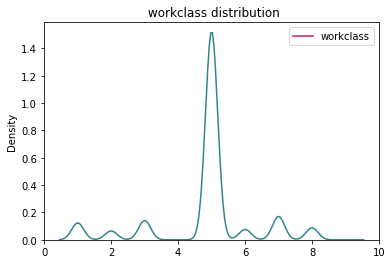

education


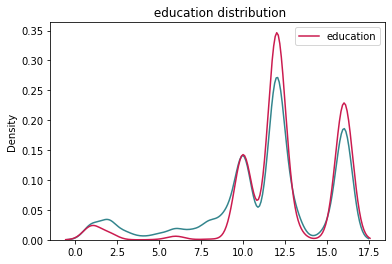

marital-status


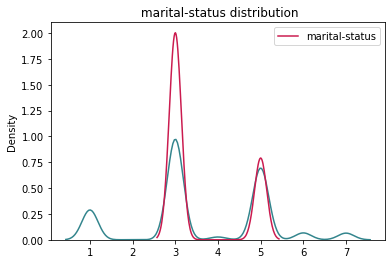

occupation


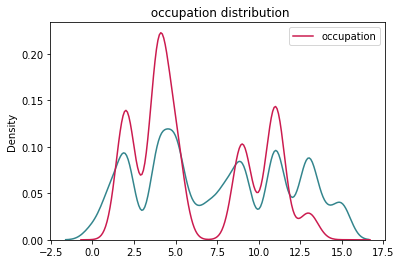

relationship


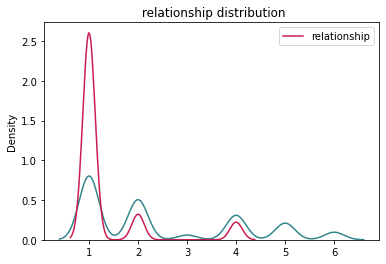

sex


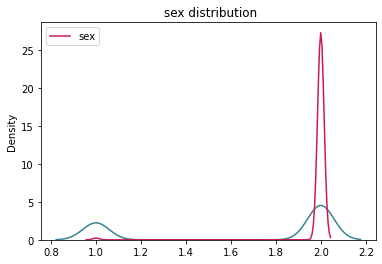

native-country


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


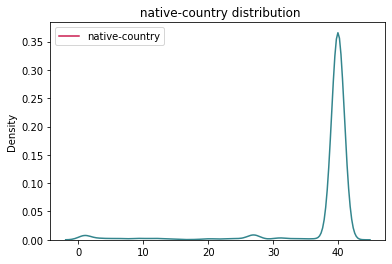

education-num_na


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


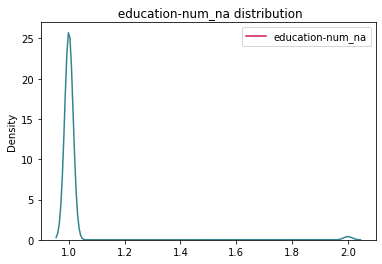

education-num


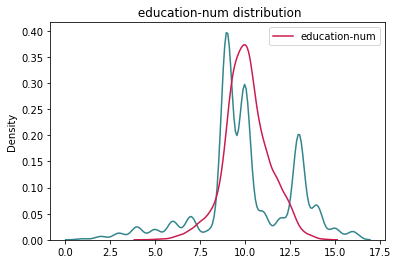

hours-per-week


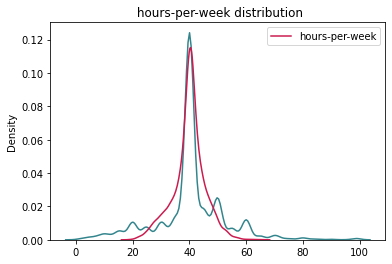

In [21]:
tvae.compare_synthetic_data_distributions()

In [25]:
# %%
tvae.train_dimension_reduction({'num_iters':200})
xenc = tvae.reduce_embed_dims(df, encode=True)

X is normalized
PaCMAP(n_neighbors=18, n_MN=9, n_FP=36, distance=euclidean, lr=1.0, n_iters=200, apply_pca=True, opt_method='adam', verbose=True, intermediate=False, seed=None)
Finding pairs
Found nearest neighbor
Calculated sigma
Found scaled dist
Pairs sampled successfully.
((586098, 2), (293049, 2), (1172196, 2))
Initial Loss: 721694.375
Iteration:   10, Loss: 498766.625000
Iteration:   20, Loss: 468656.750000
Iteration:   30, Loss: 449626.218750
Iteration:   40, Loss: 432917.875000
Iteration:   50, Loss: 416009.718750
Iteration:   60, Loss: 397724.750000
Iteration:   70, Loss: 377123.312500
Iteration:   80, Loss: 352972.000000
Iteration:   90, Loss: 322833.562500
Iteration:  100, Loss: 279624.062500
Iteration:  110, Loss: 352829.968750
Iteration:  120, Loss: 352356.875000
Iteration:  130, Loss: 352028.875000
Iteration:  140, Loss: 351909.468750
Iteration:  150, Loss: 351867.437500
Iteration:  160, Loss: 351867.468750
Iteration:  170, Loss: 351862.781250
Iteration:  180, Loss: 35187

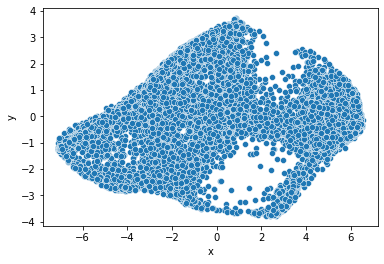

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
df_emb = df.copy()
df_emb[['x', 'y']] = xenc
sns.scatterplot(data=df_emb, x='x', y='y', hue='workclass')
plt.show()

In [24]:
# Save and load model
tvae.save()
tvae = tvae.load()

NameError: ignored